[-0.21345638 -0.85336107  0.74095407]
1.1501311587429979


2000

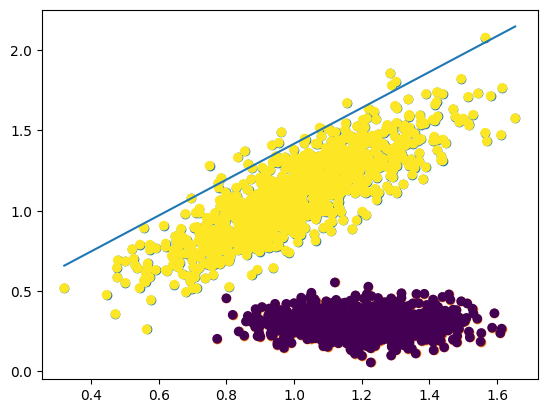

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(22)

# generate N points per class
N = 1000

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1
# generate labels
Y1 = np.ones(N)

X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3 #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)
# generate labels
Y2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# generate w_0,....,w_n
w = np.random.uniform(low=-1,size=3)
#w = w / np.linalg.norm(w)

print(w)
print(np.linalg.norm(w))

plt.plot([np.min(X1_1), np.max(X1_1)], [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])

# generate coordinate X0
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
# plt.scatter(X[:, 1], X[:, 2], c=y)

y.shape[0]

In [2]:
def error_sse(errors):
    error = np.sum(np.square(errors)) / 2
    return error

[-0.31435418 -0.9770509   1.97788083]
# of epochs =  1000


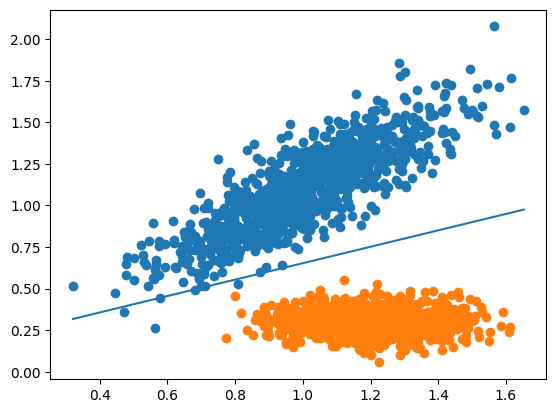

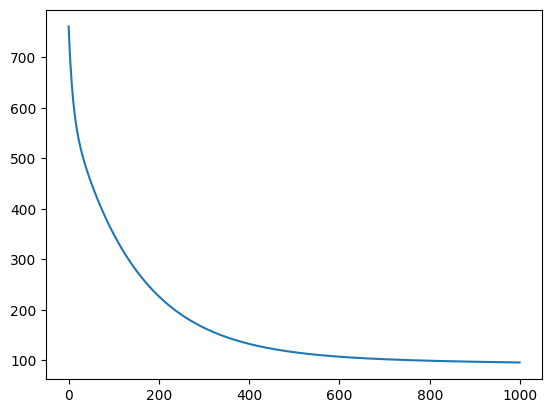

In [3]:
#np.random.seed(43)

# generate w_0,....,w_n
w = np.random.uniform(low=-1, high=1, size=3)
#w = np.zeros(3)

# set learning rate 0 < eta < 1
eta = 0.01

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 1000

# track total error per epoch
total_error = np.zeros(max_epochs)

while (epochs < max_epochs):
    
    #w = w / np.linalg.norm(w)
    
    # compute current output
    adaline_output = np.dot(X, w)
    
    # compute error for each data point
    errors = y - adaline_output
    
    # compute SSE error at this epoch
    total_error[epochs] = error_sse(errors)
    
    #print(total_error[epochs])
    
    # check if a solution is found
    # print(adaline_output)
    # if the output is negative and the label is negative the product is > 0
    # if the output is positive and the label is positive the product is < 0
    # else it's < 0 so we have an error
    if all(adaline_output * y > 0):
        break
    else:
        # update with w = w + delta_w
        # delta_w = eta * 2/n * X^T * (y - X^T w)
        delta_w = eta * 2 * np.dot(X.T, errors) / X.shape[0]
        w = w + delta_w
        
    epochs += 1
    
print(w)
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
#print(eta)
print("# of epochs = ", epochs)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])
plt.figure()
plt.plot(range(max_epochs), total_error)

# Stochastic Gradient Descent (SGD)

[ 0.39248282 -1.58517758  1.91897395]
# of epochs =  111


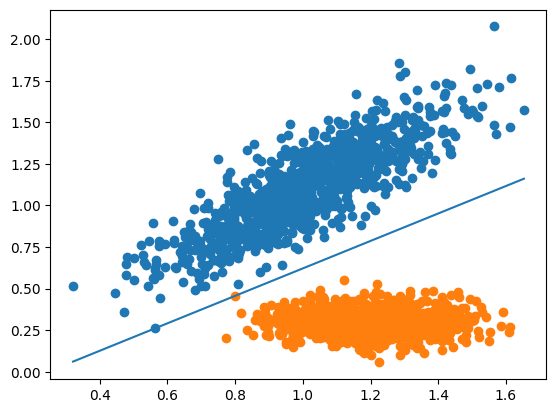

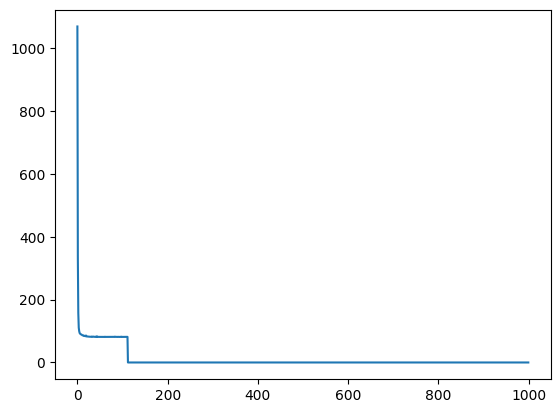

In [4]:
#np.random.seed(43)

# generate w_0,....,w_n
w = np.random.uniform(low=-0.1, high=0.1, size=3)
#w = np.zeros(3)

# set learning rate 0 < eta < 1
eta = 0.001

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 1000

# track total error per epoch
total_error = np.zeros(max_epochs)

while (epochs < max_epochs):
    
    #w = w / np.linalg.norm(w)
    
    # compute current output
    adaline_output = np.dot(X, w)
    
    # compute error for each data point
    errors = y - adaline_output
    
    # compute SSE error at this epoch
    total_error[epochs] = error_sse(errors)
    
    #print(total_error[epochs])
    
    # check if a solution is found
    # print(adaline_output)
    if all(adaline_output * y > 0):
        break
    else:
        
        # shuffle objects if we have an error. this is called mini-batch learning in deep learning
        rand_perm = np.random.permutation(range(y.shape[0]))
    
        # apply permutation and update weights
        for xi, yi in zip(X[rand_perm, :], y[rand_perm]):
            
            error = (yi - np.dot(xi, w))
            
            # update with w = w + delta_w
            delta_w = eta * 2 * xi * error
            w = w + delta_w
    
    epochs += 1
    
print(w)
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
#print(eta)
print("# of epochs = ", epochs)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])
plt.figure()
plt.plot(range(max_epochs), total_error)

In [55]:
np.random.permutation(range(10))

array([6, 9, 1, 8, 0, 2, 4, 3, 5, 7])